# Case Study

This notebook is used for debug purposes only.

In [1]:
import matplotlib.pyplot as plt

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=40)

In [4]:
!andes misc --version

Python  3.12.0
andes   1.9.3.post51+g005049af
numpy   2.0.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.15.2
pandas  2.2.3
numba   0.60.0


In this study, we use the same OPF case cause the only difference is the `StaticGen.genfuel` and it will not impact the OPF results.

The dynamic cases are:

``1.IL200_dyn_20wt.xlsx``, 20% wind penetration with IEEEG1

``2.IL200_dyn_20wt_ts.xlsx``, 20% wind penetration with IEEEG1 replaced by IEEEG1TS2

``3.IL200_dyn_50wt.xlsx``, 50% wind penetration with IEEEG1

``4.IL200_dyn_50wt_ts.xlsx``, 50% wind penetration with IEEEG1 replaced by IEEEG1TS2

``5.IL200_dyn_80wt.xlsx``, 80% wind penetration with IEEEG1

``6.IL200_dyn_80wt_ts.xlsx``, 80% wind penetration with IEEEG1 replaced by IEEEG1TS2

In [5]:
opf_cases = ['./../cases/IL200_opf_20wt.xlsx',
             './../cases/IL200_opf_50wt.xlsx',
             './../cases/IL200_opf_80wt.xlsx',]

sp1 = ams.load(opf_cases[0],
               setup=True, no_output=True,
               default_config=True)
sp2 = ams.load(opf_cases[0],
               setup=True, no_output=True,
               default_config=True)
sp3 = ams.load(opf_cases[1],
               setup=True, no_output=True,
               default_config=True)
sp4 = ams.load(opf_cases[1],
               setup=True, no_output=True,
               default_config=True)
sp5 = ams.load(opf_cases[2],
               setup=True, no_output=True,
               default_config=True)
sp6 = ams.load(opf_cases[2],
               setup=True, no_output=True,
               default_config=True)

dy_cases = ['./../cases/1.IL200_dyn_20wt.xlsx',
            './../cases/2.IL200_dyn_20wt_ts.xlsx',
            './../cases/3.IL200_dyn_50wt.xlsx',
            './../cases/4.IL200_dyn_50wt_ts.xlsx',
            './../cases/5.IL200_dyn_80wt.xlsx',
            './../cases/6.IL200_dyn_80wt_ts.xlsx',]

s1 = sp1.to_andes(addfile=dy_cases[0],
                  setup=False, no_output=True,
                  default_config=True)
s2 = sp2.to_andes(addfile=dy_cases[1],
                  setup=False, no_output=True,
                  default_config=True)
s3 = sp3.to_andes(addfile=dy_cases[2],
                  setup=False, no_output=True,
                  default_config=True)
s4 = sp4.to_andes(addfile=dy_cases[3],
                  setup=False, no_output=True,
                  default_config=True)
s5 = sp5.to_andes(addfile=dy_cases[4],
                  setup=False, no_output=True,
                  default_config=True)
s6 = sp6.to_andes(addfile=dy_cases[5],
                  setup=False, no_output=True,
                  default_config=True)

for ss in [s1, s2, s3, s4, s5, s6]:
    # add a Alter device to set load increase
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.1))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_2', src='Ppf',
                           attr='v', method='+', amount=0.1))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_3', src='Ppf',
                           attr='v', method='+', amount=0.1))

    ss.setup()

# --- Modify any other parameters if necessary ---

Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.


In [6]:
for ss in [sp1, sp2, sp3, sp4, sp5, sp6]:
    ss.DCOPF.run(solver='CLARABEL')
    ss.DCOPF.dc2ac()

In [7]:
sp1.dyn.send(adsys=s1, routine='DCOPF')
sp2.dyn.send(adsys=s2, routine='DCOPF')
sp3.dyn.send(adsys=s3, routine='DCOPF')
sp4.dyn.send(adsys=s4, routine='DCOPF')
sp5.dyn.send(adsys=s5, routine='DCOPF')
sp6.dyn.send(adsys=s6, routine='DCOPF')

True

In [8]:
for ss in [s1, s2, s3, s4, s5, s6]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

    _ = ss.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_26 | 0      | 1    
 GENROU_27 | 0      | 1    
 GENROU_28 | 0      | 1    
 GENROU_29 | 0      | 1    
 GENROU_30 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower li

In [9]:
for ss in [s1, s2, s3, s4, s5, s6]:

    ss.TDS.config.tf = 80
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True

    ss.TDS.run()

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.17385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.11695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.17947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.17385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.11695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.17947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.17385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.11695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.17947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.17385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.11695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.17947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.17385 at t=1. P

In [10]:
legends = [r'Case1: IEEEG1 20\% Wind',
           r'Case2: IEEEG1TS2 20\% Wind',
           r'Case3: IEEEG1 50\% Wind',
           r'Case4: IEEEG1TS2 50\% Wind',
           r'Case5: IEEEG1 80\% Wind',
           r'Case6: IEEEG1TS2 80\% Wind']
colors = ['tab:blue', 'tab:orange', 'tab:green',
          'tab:red', 'tab:purple', 'tab:brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

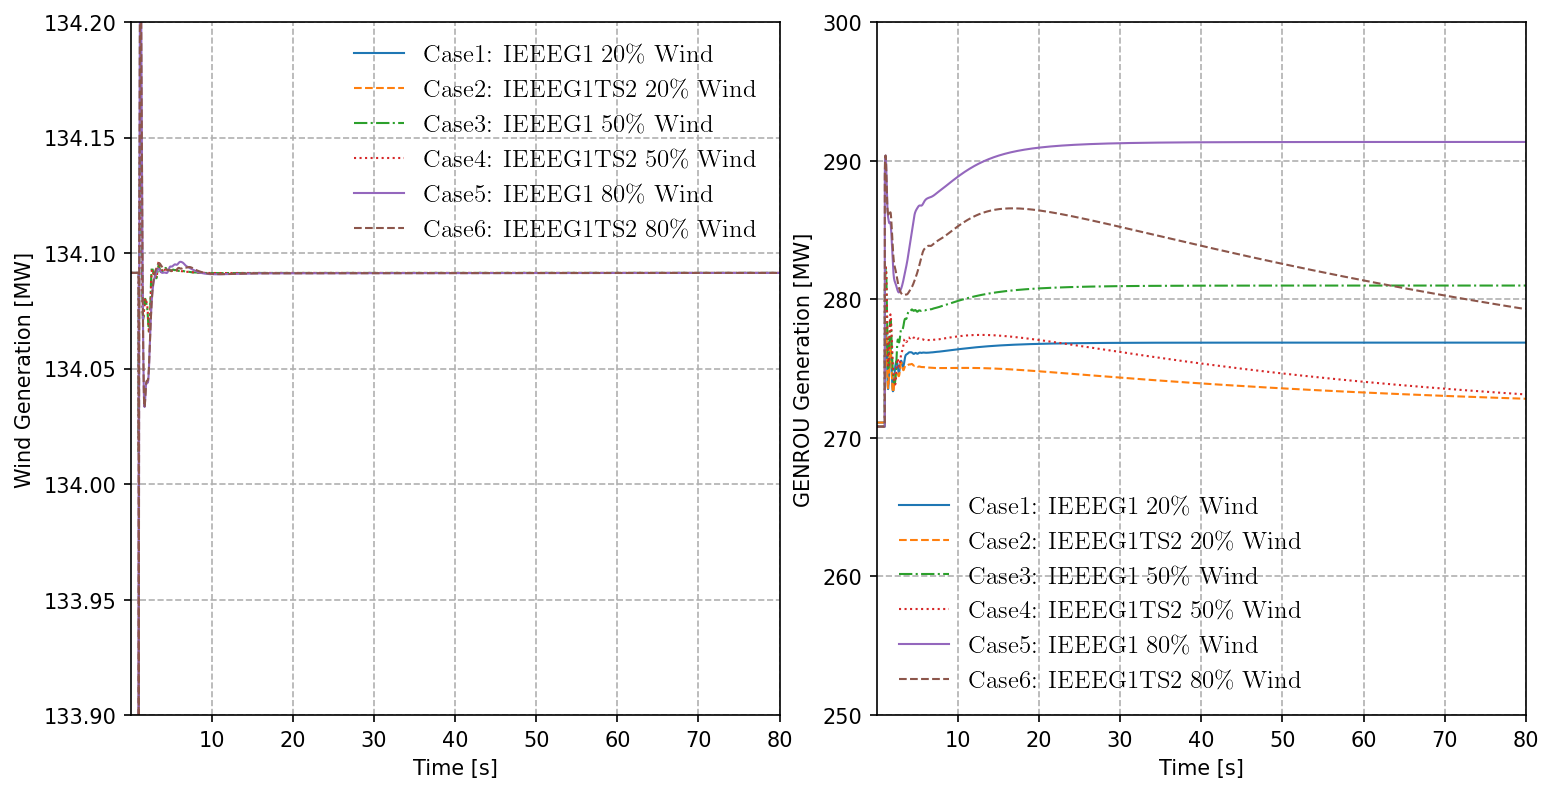

In [11]:
plt.style.use('default')
fig0, ax0 = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.15)

a = (0,)
wmin, wmax = 133.9, 134.2
regc_idx = 'REGCA_1'
_ = s1.TDS.plt.plot(s1.REGCA1.Pe,
                    a=s1.REGCA1.idx2uid(regc_idx),
                    ymin=wmin, ymax=wmax,
                    ytimes=s1.config.mva,
                    yheader=[legends[0]],
                    show=False, grid=True,
                    ylabel='Wind Generation [MW]',
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=fig0, ax=ax0[0],)
_ = s2.TDS.plt.plot(s2.REGCA1.Pe,
                    a=s2.REGCA1.idx2uid(regc_idx),
                    ytimes=s2.config.mva,
                    yheader=[legends[1]],
                    show=False,
                    colors=[colors[1]],
                    linestyles=[linestyles[1]],
                    fig=fig0, ax=ax0[0],)
_ = s3.TDS.plt.plot(s3.REGCA1.Pe,
                    a=s3.REGCA1.idx2uid(regc_idx),
                    ytimes=s3.config.mva,
                    yheader=[legends[2]],
                    show=False,
                    colors=[colors[2]],
                    linestyles=[linestyles[2]],
                    fig=fig0, ax=ax0[0],)
_ = s4.TDS.plt.plot(s4.REGCA1.Pe,
                    a=s4.REGCA1.idx2uid(regc_idx),
                    ytimes=s4.config.mva,
                    yheader=[legends[3]],
                    show=False,
                    colors=[colors[3]],
                    linestyles=[linestyles[3]],
                    fig=fig0, ax=ax0[0],)
_ = s5.TDS.plt.plot(s5.REGCA1.Pe,
                    a=s5.REGCA1.idx2uid(regc_idx),
                    ymin=wmin, ymax=wmax,
                    ytimes=s5.config.mva,
                    yheader=[legends[4]],
                    show=False,
                    colors=[colors[4]],
                    linestyles=[linestyles[4]],
                    fig=fig0, ax=ax0[0],)
_ = s6.TDS.plt.plot(s6.REGCA1.Pe,
                    a=s6.REGCA1.idx2uid(regc_idx),
                    ytimes=s6.config.mva,
                    yheader=[legends[5]],
                    show=False,
                    colors=[colors[5]],
                    linestyles=[linestyles[5]],
                    fig=fig0, ax=ax0[0],)

smin, smax = 250, 300
genrou_idx = 'GENROU_47'
_ = s1.TDS.plt.plot(s1.GENROU.Pe,
                    a=s1.GENROU.idx2uid(genrou_idx),
                    ymin=smin, ymax=smax,
                    ytimes=s1.config.mva,
                    yheader=[legends[0]],
                    show=False, grid=True,
                    ylabel='GENROU Generation [MW]',
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=fig0, ax=ax0[1],)
_ = s2.TDS.plt.plot(s2.GENROU.Pe,
                    a=s2.GENROU.idx2uid(genrou_idx),
                    ytimes=s2.config.mva,
                    yheader=[legends[1]],
                    show=False,
                    colors=[colors[1]],
                    linestyles=[linestyles[1]],
                    fig=fig0, ax=ax0[1],)
_ = s3.TDS.plt.plot(s3.GENROU.Pe,
                    a=s3.GENROU.idx2uid(genrou_idx),
                    ytimes=s3.config.mva,
                    yheader=[legends[2]],
                    show=False,
                    colors=[colors[2]],
                    linestyles=[linestyles[2]],
                    fig=fig0, ax=ax0[1],)
_ = s4.TDS.plt.plot(s4.GENROU.Pe,
                    a=s4.GENROU.idx2uid(genrou_idx),
                    ytimes=s4.config.mva,
                    yheader=[legends[3]],
                    show=False,
                    colors=[colors[3]],
                    linestyles=[linestyles[3]],
                    fig=fig0, ax=ax0[1],)
_ = s5.TDS.plt.plot(s5.GENROU.Pe,
                    a=s5.GENROU.idx2uid(genrou_idx),
                    ymin=smin, ymax=smax,
                    ytimes=s5.config.mva,
                    yheader=[legends[4]],
                    show=False,
                    colors=[colors[4]],
                    linestyles=[linestyles[4]],
                    fig=fig0, ax=ax0[1],)
_ = s6.TDS.plt.plot(s6.GENROU.Pe,
                    a=s6.GENROU.idx2uid(genrou_idx),
                    ytimes=s6.config.mva,
                    yheader=[legends[5]],
                    show=False,
                    colors=[colors[5]],
                    linestyles=[linestyles[5]],
                    fig=fig0, ax=ax0[1],)

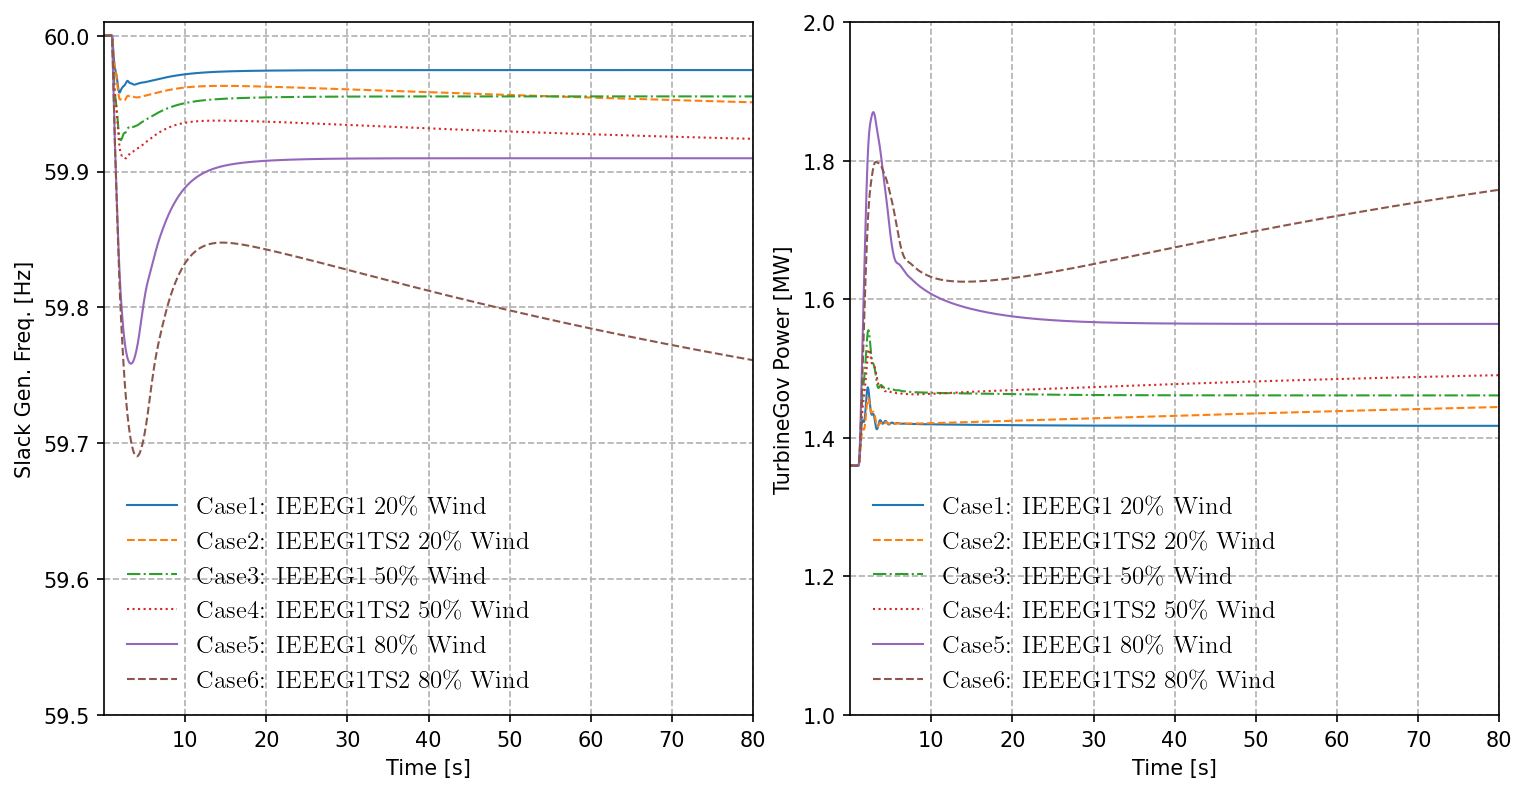

In [12]:
plt.style.use('default')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.15)

fmin, fmax = 59.5, 60.01

genrou_idx = 'GENROU_47'
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=s1.GENROU.idx2uid(genrou_idx),
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    show=False, grid=True,
                    ylabel='Slack Gen. Freq. [Hz]',
                    yheader=[legends[0]],
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=fig, ax=ax[0])
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=s2.GENROU.idx2uid(genrou_idx),
                    ytimes=s2.config.freq,
                    show=False,
                    yheader=[legends[1]],
                    colors=[colors[1]],
                    linestyles=[linestyles[1]],
                    fig=fig, ax=ax[0],)
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=s3.GENROU.idx2uid(genrou_idx),
                    ytimes=s3.config.freq,
                    show=False,
                    yheader=[legends[2]],
                    colors=[colors[2]],
                    linestyles=[linestyles[2]],
                    fig=fig, ax=ax[0],)
_ = s4.TDS.plt.plot(s4.GENROU.omega,
                    a=s4.GENROU.idx2uid(genrou_idx),
                    ytimes=s4.config.freq,
                    show=False,
                    yheader=[legends[3]],
                    colors=[colors[3]],
                    linestyles=[linestyles[3]],
                    fig=fig, ax=ax[0],)
_ = s5.TDS.plt.plot(s5.GENROU.omega,
                    a=s5.GENROU.idx2uid(genrou_idx),
                    ymin=fmin, ymax=fmax,
                    ytimes=s5.config.freq,
                    show=False,
                    yheader=[legends[4]],
                    colors=[colors[4]],
                    linestyles=[linestyles[4]],
                    fig=fig, ax=ax[0],)
_ = s6.TDS.plt.plot(s6.GENROU.omega,
                    a=s6.GENROU.idx2uid(genrou_idx),
                    ytimes=s6.config.freq,
                    show=False,
                    yheader=[legends[5]],
                    colors=[colors[5]],
                    linestyles=[linestyles[5]],
                    fig=fig, ax=ax[0],)

tmin, tmax = 1, 2
ieeeg1_idx = 'IEEEG1_2'
_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=s1.IEEEG1.idx2uid(ieeeg1_idx),
                    ytimes=s1.config.mva,
                    ymin=tmin, ymax=tmax,
                    show=False, grid=True,
                    ylabel='TurbineGov Power [MW]',
                    yheader=[legends[0]],
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=fig, ax=ax[1],)
_ = s2.TDS.plt.plot(s2.IEEEG1TS2.pout,
                    a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=[legends[1]],
                    colors=[colors[1]],
                    linestyles=[linestyles[1]],
                    fig=fig, ax=ax[1],)
_ = s3.TDS.plt.plot(s3.IEEEG1.pout,
                    a=s3.IEEEG1.idx2uid(ieeeg1_idx),
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=[legends[2]],
                    colors=[colors[2]],
                    linestyles=[linestyles[2]],
                    fig=fig, ax=ax[1],)
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.pout,
                    a=s4.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=[legends[3]],
                    colors=[colors[3]],
                    linestyles=[linestyles[3]],
                    fig=fig, ax=ax[1],)
_ = s5.TDS.plt.plot(s5.IEEEG1.pout,
                    a=s5.IEEEG1.idx2uid(ieeeg1_idx),
                    ytimes=s2.config.mva,
                    ymin=tmin, ymax=tmax,
                    show=False,
                    yheader=[legends[4]],
                    colors=[colors[4]],
                    linestyles=[linestyles[4]],
                    fig=fig, ax=ax[1],)
_ = s6.TDS.plt.plot(s6.IEEEG1TS2.pout,
                    a=s6.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ytimes=s2.config.mva,
                    show=False,
                    yheader=[legends[5]],
                    colors=[colors[5]],
                    linestyles=[linestyles[5]],
                    fig=fig, ax=ax[1],)

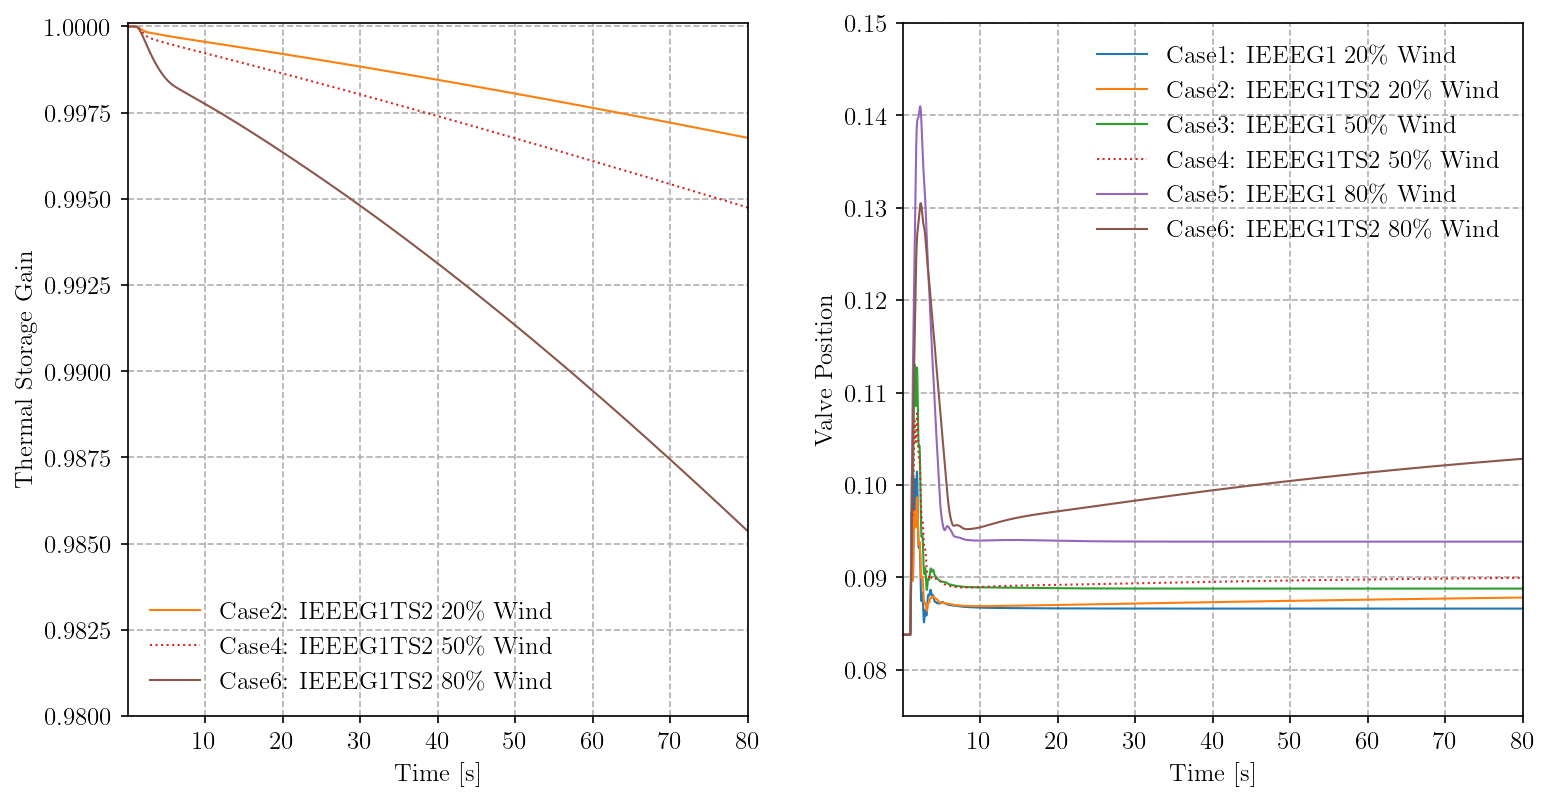

In [13]:
fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.25)

ieeeg1_idx = 'IEEEG1_10'
_ = s2.TDS.plt.plot(s2.IEEEG1TS2.TS.y,
                    a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ymin=0.98, ymax=1.0001,
                    ycalc=lambda x: 1 - x,
                    show=False, grid=True,
                    ylabel='Thermal Storage Gain',
                    yheader=[legends[1]],
                    color=colors[1],
                    linestyles=linestyles[1],
                    fig=fig1, ax=ax1[0])
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.TS.y,
                    a=s4.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=[legends[3]],
                    color=colors[3],
                    linestyles=linestyles[3],
                    fig=fig1, ax=ax1[0])
_ = s6.TDS.plt.plot(s6.IEEEG1TS2.TS.y,
                    a=s6.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=[legends[5]],
                    color=colors[5],
                    linestyles=linestyles[5],
                    fig=fig1, ax=ax1[0])

_ = s1.TDS.plt.plot(s1.IEEEG1.GV,
                    a=s1.IEEEG1.idx2uid(ieeeg1_idx),
                    show=False, grid=True,
                    ymin=0.075, ymax=0.150,
                    ylabel='Valve Position',
                    yheader=[legends[0]],
                    color=colors[0],
                    linestyles=linestyles[0],
                    fig=fig1, ax=ax1[1])
_ = s2.TDS.plt.plot(s2.IEEEG1TS2.GV,
                    a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    show=False,
                    yheader=[legends[1]],
                    color=colors[1],
                    linestyles=linestyles[1],
                    fig=fig1, ax=ax1[1])
_ = s3.TDS.plt.plot(s3.IEEEG1.GV,
                    a=s3.IEEEG1.idx2uid(ieeeg1_idx),
                    show=False,
                    yheader=[legends[2]],
                    color=colors[2],
                    linestyles=linestyles[2],
                    fig=fig1, ax=ax1[1])
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.GV,
                    a=s4.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    show=False,
                    yheader=[legends[3]],
                    color=colors[3],
                    linestyles=linestyles[3],
                    fig=fig1, ax=ax1[1])
_ = s5.TDS.plt.plot(s5.IEEEG1.GV,
                    a=s5.IEEEG1.idx2uid(ieeeg1_idx),
                    show=False,
                    yheader=[legends[4]],
                    color=colors[4],
                    linestyles=linestyles[4],
                    fig=fig1, ax=ax1[1])
_ = s6.TDS.plt.plot(s6.IEEEG1TS2.GV,
                    a=s6.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    show=False,
                    yheader=[legends[5]],
                    color=colors[5],
                    linestyles=linestyles[5],
                    fig=fig1, ax=ax1[1])